# Data labeling

Given the dataset, we proceed to label each song's lyrics as either 1 or 0, depending on their coordinates in the PAD model.

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Appunti/TXA/TXA - the Sloop 🏴‍☠️/FINAL/Notebooks/crossed_dataset.csv')

Mounted at /content/drive


In [ ]:
import math
# Labeling as 1 all the songs below 5 in all three dimensions
def sentiment(row):
    valence = row[5]
    arousal = row[6]
    dominance = row[7]
    if valence <= 5 and dominance <= 5 and arousal <= 5:
        return 1
    else:
        return 0

df['sentiment'] = df.apply(sentiment, axis=1)


# Counting songs per class and percentage
positives = df[df['sentiment'] == 1].shape[0]
whole = len(df)
percentage = (positives / whole) * 100
print(f"=====================\n Class1 = {math.floor(percentage)}% of dataset \n=====================")

portions = df.groupby(['sentiment']).count()
portions['lyrics']

 Class1 = 22% of dataset 


sentiment
0    21413
1     6226
Name: lyrics, dtype: int64

We export the labeled dataset for future use.

In [ ]:
#df.to_csv("dataset.csv")

#Data analysis
We visualize our dataset in the PAD model using a 3D scatter plot. We also run clustering as a starting point for data labeling.

##Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


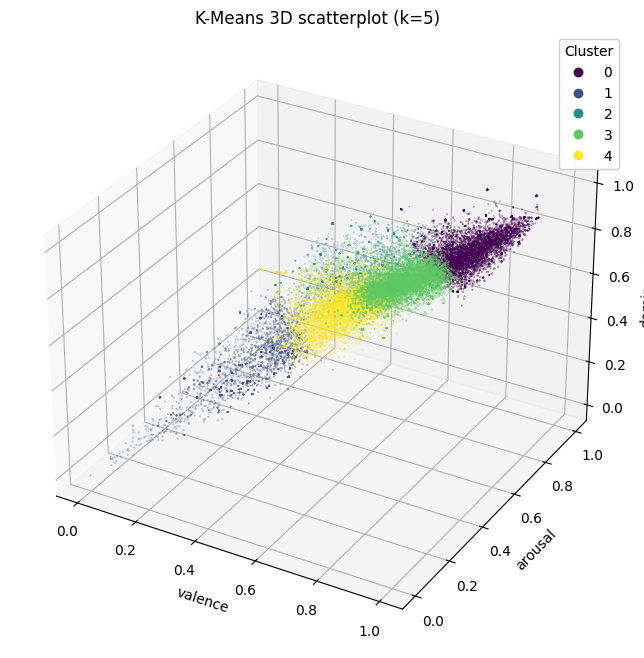

In [ ]:
from sklearn.metrics import *
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['valence_tags', 'arousal_tags', 'dominance_tags']])

# Normalize the data for visualization
scaler = MinMaxScaler()
df[['valence_tags', 'arousal_tags', 'dominance_tags']] = scaler.fit_transform(df[['valence_tags', 'arousal_tags', 'dominance_tags']])

# Create the three-dimensional scatterplot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['valence_tags'], df['arousal_tags'], df['dominance_tags'], c=df['cluster'], cmap='viridis', s=0.1)

ax.set_xlabel('valence')
ax.set_ylabel('arousal')
ax.set_zlabel('dominance', rotation=90)
ax.set_title('K-Means 3D scatterplot (k=5)')

# Add the legend for the clusters
legend = ax.legend(*scatter.legend_elements(), title='Cluster')
ax.add_artist(legend)
plt.show()


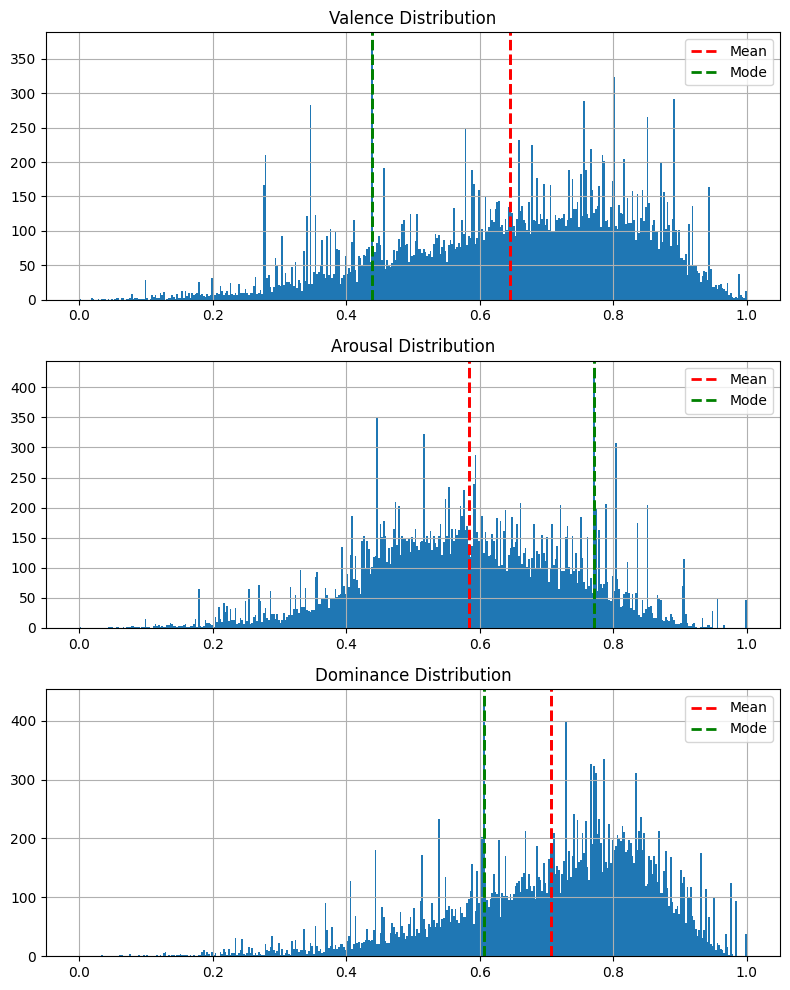

In [ ]:
# create a histogram for each column in DataFrame
fig, axis = plt.subplots(3, 1, figsize=(8,10))
df[['valence_tags', 'arousal_tags', 'dominance_tags']].hist(ax=axis, bins=400)

for ax in plt.gcf().axes:
    mean = df[ax.title.get_text()].mean()
    mode = df[ax.title.get_text()].mode()[0]
    ax.axvline(mean, color='r', linestyle='dashed', linewidth=2)
    ax.axvline(mode, color='g', linestyle='dashed', linewidth=2)

# Titles for each histogram
titles = ['Valence Distribution', 'Arousal Distribution', 'Dominance Distribution']

# Set custom titles and add vertical lines for mean and mode
for ax, title in zip(axis, titles):
    mean = df[ax.title.get_text()].mean()
    mode = df[ax.title.get_text()].mode()[0]
    ax.set_title(title)  # Set the custom title
    ax.axvline(mean, color='r', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(mode, color='g', linestyle='dashed', linewidth=2, label='Mode')
    ax.legend()  # Add a legend to show labels for mean and mode

# Adjust the layout to prevent overlapping and display the plot
plt.tight_layout()

plt.show()

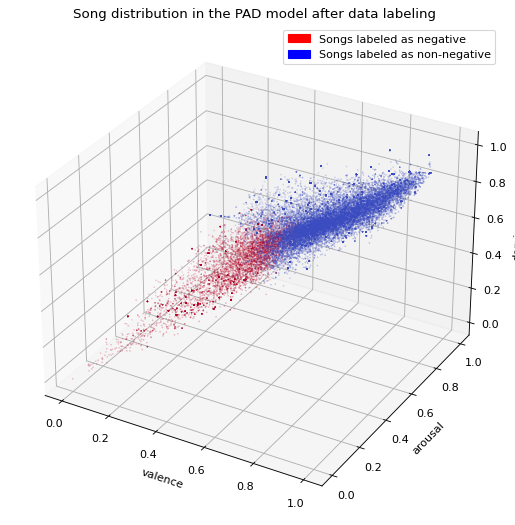

In [ ]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8), dpi=80)
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['valence_tags'], df['arousal_tags'], df['dominance_tags'],
           c=df['sentiment'], cmap='coolwarm', s=0.05)

# Set title and labels
ax.set_xlabel('valence')
ax.set_ylabel('arousal')
ax.set_zlabel('dominance')
ax.set_title('Song distribution in the PAD model after data labeling')

# Create a legend
red_patch = mpatches.Patch(color='red', label='Songs labeled as negative')
blue_patch = mpatches.Patch(color='blue', label='Songs labeled as non-negative')
ax.legend(handles=[red_patch, blue_patch])

# Show the plot
plt.show()

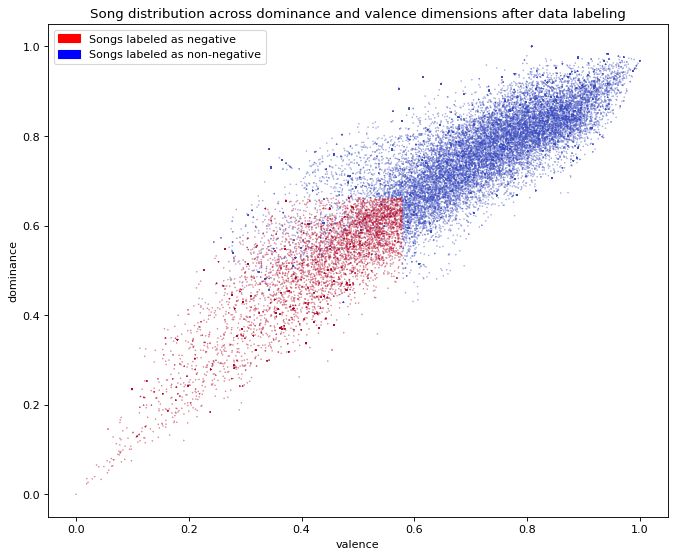

In [ ]:
# Create a 2D scatter plot
fig, ax = plt.subplots(figsize=(10, 8), dpi=80)
ax.scatter(df['valence_tags'], df['dominance_tags'], c=df['sentiment'], cmap='coolwarm',
           s=0.05)

# Set the labels for the axes
ax.set_xlabel('valence')
ax.set_ylabel('dominance')

# Set the title for the plot
ax.set_title('Song distribution across dominance and valence dimensions after data labeling')

# Create a legend
red_patch = mpatches.Patch(color='red', label='Songs labeled as negative')
blue_patch = mpatches.Patch(color='blue', label='Songs labeled as non-negative')
ax.legend(handles=[red_patch, blue_patch])

# Show the plot
plt.show()

#WordCloud
Let's create a wordcloud to investigate...




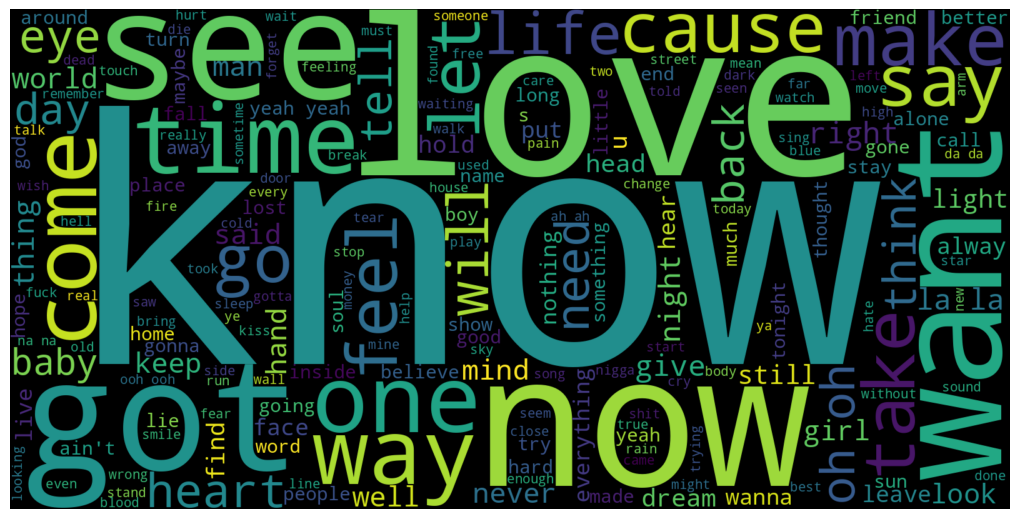

In [ ]:
import re
import nltk
import csv
from wordcloud import WordCloud

def clean_text(text):
    # Remove comments between square brackets
    text = re.sub(r'\[.*?\]', '', text)
    # Remove linebreak characters
    text = re.sub(r'\n', ' ', text)
    # Convert text to lowercase
    text = text.lower()
    return text

# Read the 'lyrics' column from the CSV file
full_lyrics = []
with open('/content/drive/MyDrive/Appunti/TXA/TXA - the Sloop 🏴‍☠️/FINAL/Notebooks/labeled_dataset.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        full_lyrics.append(row['lyrics'])

clean_lyrics = [clean_text(i) for i in full_lyrics]

# Generate a word cloud image with higher resolution
wordcloud = WordCloud(width=1600, height=800).generate(' '.join(clean_lyrics))

# Display the generated image with improved definition
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# you can see malformed words in wordcloud
# report exact proportion of 0 and 1 with numbers

#Word2Vec

In [ ]:
from gensim.models import Word2Vec
import re
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
nltk.download('stopwords')
nltk.download('wordnet')

# Define the function for text cleaning
def clean_text(text):
    # Remove comments in square brackets
    text = re.sub(r'\[.*?\]', '', text)
    # Remove line break characters
    text = re.sub(r'\n', ' ', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert the text to lowercase
    text = text.lower()
    # Tokenize the text
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    words = w_tokenizer.tokenize(text)
    # Remove stopwords
    stopwords = nltk.corpus.stopwords.words('english')
    words = [word for word in words if word not in stopwords]
    # Lemmatize the text
    lemmatizer = nltk.stem.WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return words

# Example of tokenized text
tok_sents = df['lyrics'].apply(clean_text).tolist()

# Train the Word2Vec model with the tokenized text
w2v_model = Word2Vec(tok_sents, vector_size=100, window=10, min_count=5, sg=1, epochs=20, negative=10)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
for index, word in enumerate(w2v_model.wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(w2v_model.wv.index_to_key)} is {word}")

word #0/26213 is im
word #1/26213 is love
word #2/26213 is dont
word #3/26213 is know
word #4/26213 is like
word #5/26213 is oh
word #6/26213 is get
word #7/26213 is go
word #8/26213 is time
word #9/26213 is youre


In [ ]:
similar_words = w2v_model.wv.most_similar("sad")
print(similar_words)


[('bad', 0.6920913457870483), ('ended', 0.6257350444793701), ('sadder', 0.6131061911582947), ('twentythree', 0.6129305958747864), ('note', 0.5957248210906982), ('lonely', 0.5927258729934692), ('song', 0.5813915729522705), ('glad', 0.5656513571739197), ('wrote', 0.5633981823921204), ('maudlin', 0.5619017481803894)]


In [ ]:
# Define a function to obtain word vectors
def get_word_vectors(text, model):
    words = clean_text(text)  # Apply the cleaning function to the text
    vectors = []
    for word in words:
        if word in model.wv.key_to_index:  # Check if the word is present in the model's vocabulary
            vectors.append(model.wv[word])  # Obtain the word vector from the Word2Vec model
    return vectors
song_vectors_list = []

# Iterate over all songs in the dataframe
for song_text in df['lyrics']:
    song_vectors = get_word_vectors(song_text, w2v_model)  # Obtain the word vectors for each song
    song_vectors_list.append(song_vectors)  # Add the song's word vectors to the list

# song_vectors_list will contain a list of lists, where each list corresponds to the word vectors of a song <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


In [ ]:
# Define the keywords associated with negative emotions
negative_emotions_keywords = ['sad', 'unhappy', 'depressed', 'miserable', 'gloomy']

# List to store the results
similarity_scores = []

# Calculate the similarity between the negative emotion keywords and the words in the song lyrics for each year
for year in df['year'].unique():
    # Select the songs for the current year
    songs_for_year = df[df['year'] == year]['lyrics'].tolist()

    # Calculate the average similarity for the current year
    total_similarity = 0
    for song in songs_for_year:
        song_words = clean_text(song)
        for keyword in negative_emotions_keywords:
            # Calculate the similarity between each keyword and the words in the song lyrics
            similarity = sum([w2v_model.wv.similarity(keyword, word) for word in song_words if word in w2v_model.wv.index_to_key])
            total_similarity += similarity

    # Calculate the average similarity between the negative emotion keywords and the songs for the current year
    average_similarity = total_similarity / (len(songs_for_year) * len(negative_emotions_keywords))

    # Store the result
    similarity_scores.append((year, average_similarity))

# Print the results
for year, similarity in similarity_scores:
    print(f"Year {year}: Average similarity = {similarity}")


Year 2002.0: Average similarity = 27.717385097824277
Year 2003.0: Average similarity = 27.27948888867017
Year 2007.0: Average similarity = 28.319697988751212
Year 2001.0: Average similarity = 27.480958449278482
Year 2004.0: Average similarity = 27.243058378346056
Year 2016.0: Average similarity = 35.29065457133809
Year 1995.0: Average similarity = 28.545206182845682
Year 1999.0: Average similarity = 27.2151499377524
Year 1981.0: Average similarity = 26.52864964814199
Year 2010.0: Average similarity = 28.435800124230965
Year 2000.0: Average similarity = 28.600832099014056
Year 2006.0: Average similarity = 27.959287646506606
Year 1988.0: Average similarity = 28.207564289427445
Year 1964.0: Average similarity = 62.174556826781085
Year 2014.0: Average similarity = 32.587784136820076
Year 2009.0: Average similarity = 28.34992481610529
Year 2008.0: Average similarity = 27.690997094582123
Year 1998.0: Average similarity = 25.838073615021244
Year 1994.0: Average similarity = 26.75415366083503


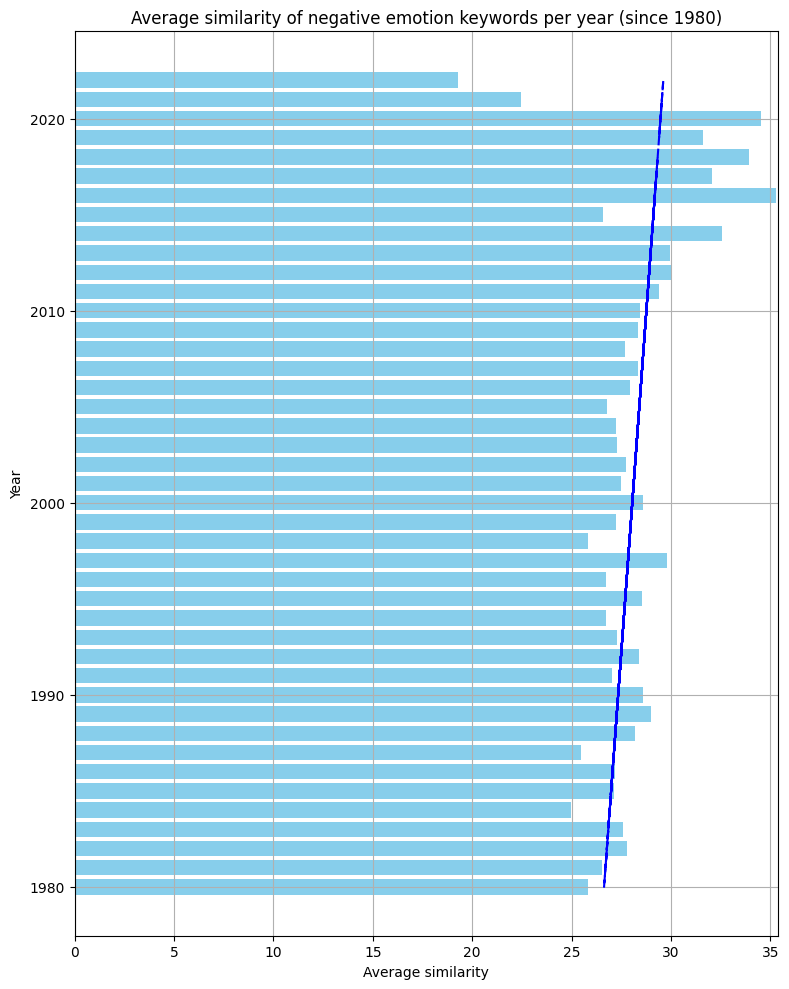

In [ ]:
# Filter the results to consider only the years from 1980 onwards
filtered_similarity_scores = [result for result in similarity_scores if result[0] >= 1980]
years = [year for year, _ in filtered_similarity_scores]
similarities = [similarity for _, similarity in filtered_similarity_scores]

# Create the bar chart
plt.figure(figsize=(8, 10))
plt.barh(years, similarities, color='skyblue')
plt.title('Average similarity of negative emotion keywords per year (since 1980)')
plt.xlabel('Average similarity')
plt.ylabel('Year')
plt.xlim(0, max(similarities) + 0.1)  # Set the limit on the x-axis
plt.grid(axis='x')

# Calculate the trend line
z = np.polyfit(years, similarities, 1)  # Linear regression
p = np.poly1d(z)
plt.plot(p(years), years, "b--")  # Dashed red trend line

plt.grid(axis='y')
plt.tight_layout()

# Show the chart
plt.show()
